
# Credit Card Fraud Detection
The dataset contains transactions made by credit cards in September 2013 by european cardholders.



The data is available on [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)

###Importing libraries





In [1]:
%tensorflow_version 2.x

In [2]:
from google.colab import drive
drive.mount('/content/drive')
root = '/content/drive/My Drive/Colab Notebooks/Credit Card Fruad Detection/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd 
import numpy as np

In [4]:
from sklearn.preprocessing import StandardScaler
scl =  StandardScaler()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.display import Image
import pydotplus

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [249]:
# To store tarained models
import pickle

Machine Learning Algorithms


In [7]:
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
from sklearn import svm

In [13]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras import regularizers

Using TensorFlow backend.


##Reaing Data

In [14]:
data = pd.read_csv(root+'creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

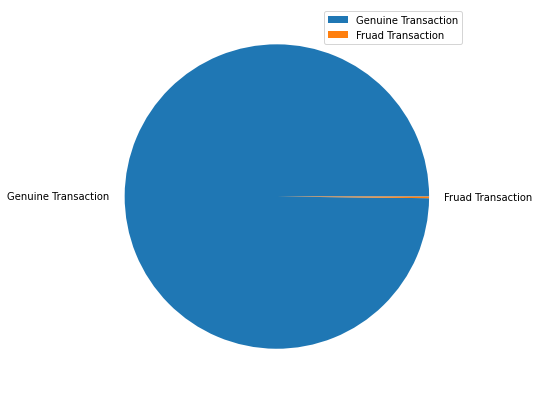

In [16]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data['Class'].value_counts(),
        labels = ['Genuine Transaction','Fruad Transaction'])
plt.legend()
plt.show()

This dataset represents transactions that occurred in two days, where we have 492 cases of fraud out of 284,807 transactions. The dataset is highly unbalanced, the positive class (known fraudulent transactions) account for only 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

##Data Modification
 As all other values are PCA modified accept amount ,we will normalize it and leave the rest. All other column remain same.

In [17]:
data = data.drop(['Time'],axis =1)
data['Amount'] =  scl.fit_transform(data['Amount'].values.reshape(-1,1))
data['Amount'].head()
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [18]:
X = data.drop(['Class'],axis=1)
Y = data['Class']
Xgenuine = data[data['Class'] == 0].drop(['Class'],axis=1)
Xfraud = data[data['Class'] == 1].drop(['Class'],axis=1)
Ygenuine = data[data['Class'] == 0]['Class']
Yfraud = data[data['Class'] == 1]['Class']

<Figure size 432x288 with 0 Axes>

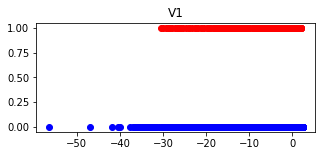

<Figure size 432x288 with 0 Axes>

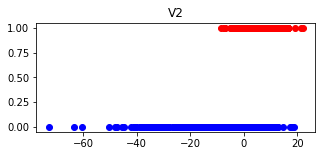

<Figure size 432x288 with 0 Axes>

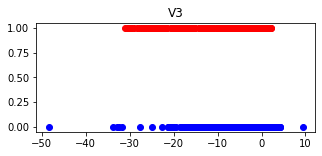

<Figure size 432x288 with 0 Axes>

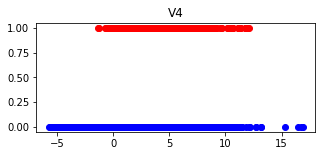

<Figure size 432x288 with 0 Axes>

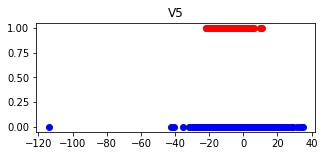

<Figure size 432x288 with 0 Axes>

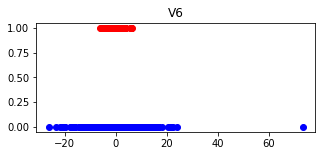

<Figure size 432x288 with 0 Axes>

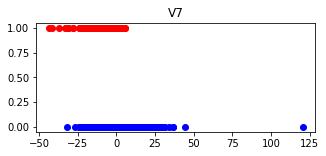

<Figure size 432x288 with 0 Axes>

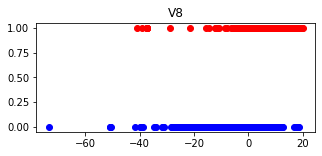

<Figure size 432x288 with 0 Axes>

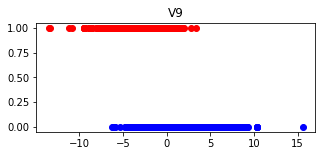

<Figure size 432x288 with 0 Axes>

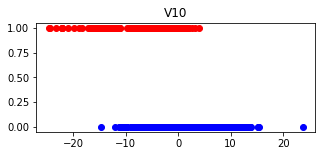

<Figure size 432x288 with 0 Axes>

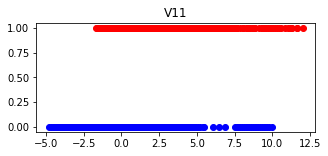

<Figure size 432x288 with 0 Axes>

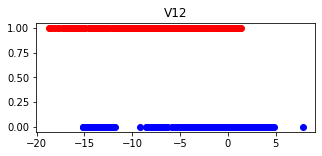

<Figure size 432x288 with 0 Axes>

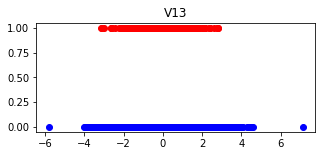

<Figure size 432x288 with 0 Axes>

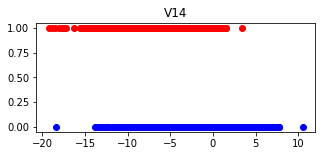

<Figure size 432x288 with 0 Axes>

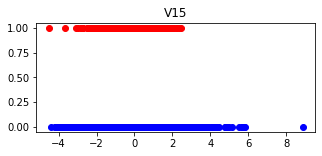

<Figure size 432x288 with 0 Axes>

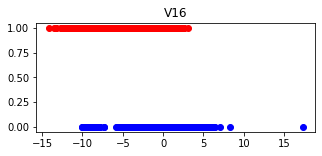

<Figure size 432x288 with 0 Axes>

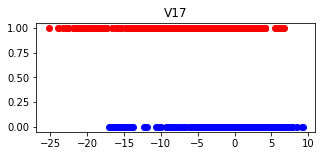

<Figure size 432x288 with 0 Axes>

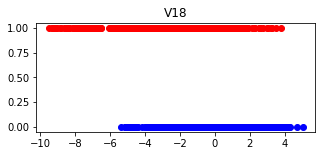

<Figure size 432x288 with 0 Axes>

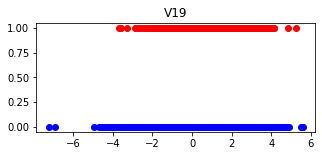

<Figure size 432x288 with 0 Axes>

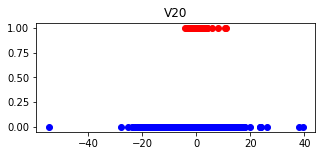

<Figure size 432x288 with 0 Axes>

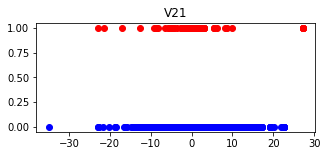

<Figure size 432x288 with 0 Axes>

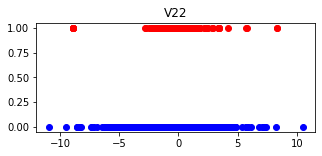

<Figure size 432x288 with 0 Axes>

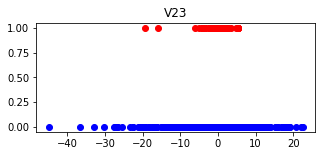

<Figure size 432x288 with 0 Axes>

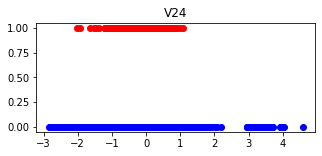

<Figure size 432x288 with 0 Axes>

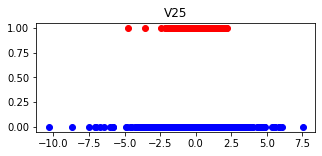

<Figure size 432x288 with 0 Axes>

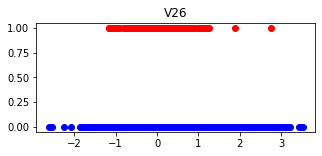

<Figure size 432x288 with 0 Axes>

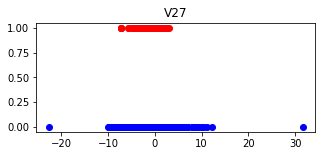

<Figure size 432x288 with 0 Axes>

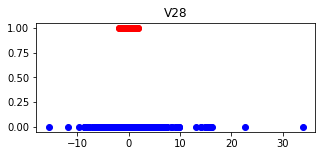

<Figure size 432x288 with 0 Axes>

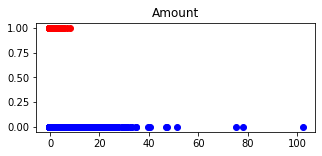

In [19]:
for i in Xgenuine:
  plt.clf()
  plt.figure(figsize = (5,2))
  plt.scatter(Xgenuine[i],Ygenuine,c='b')
  plt.scatter(Xfraud[i],Yfraud,c='r')
  plt.title(i)
  plt.savefig(root + 'Variation Over Data/'+i+'.png')
  plt.show()

<Figure size 432x288 with 0 Axes>

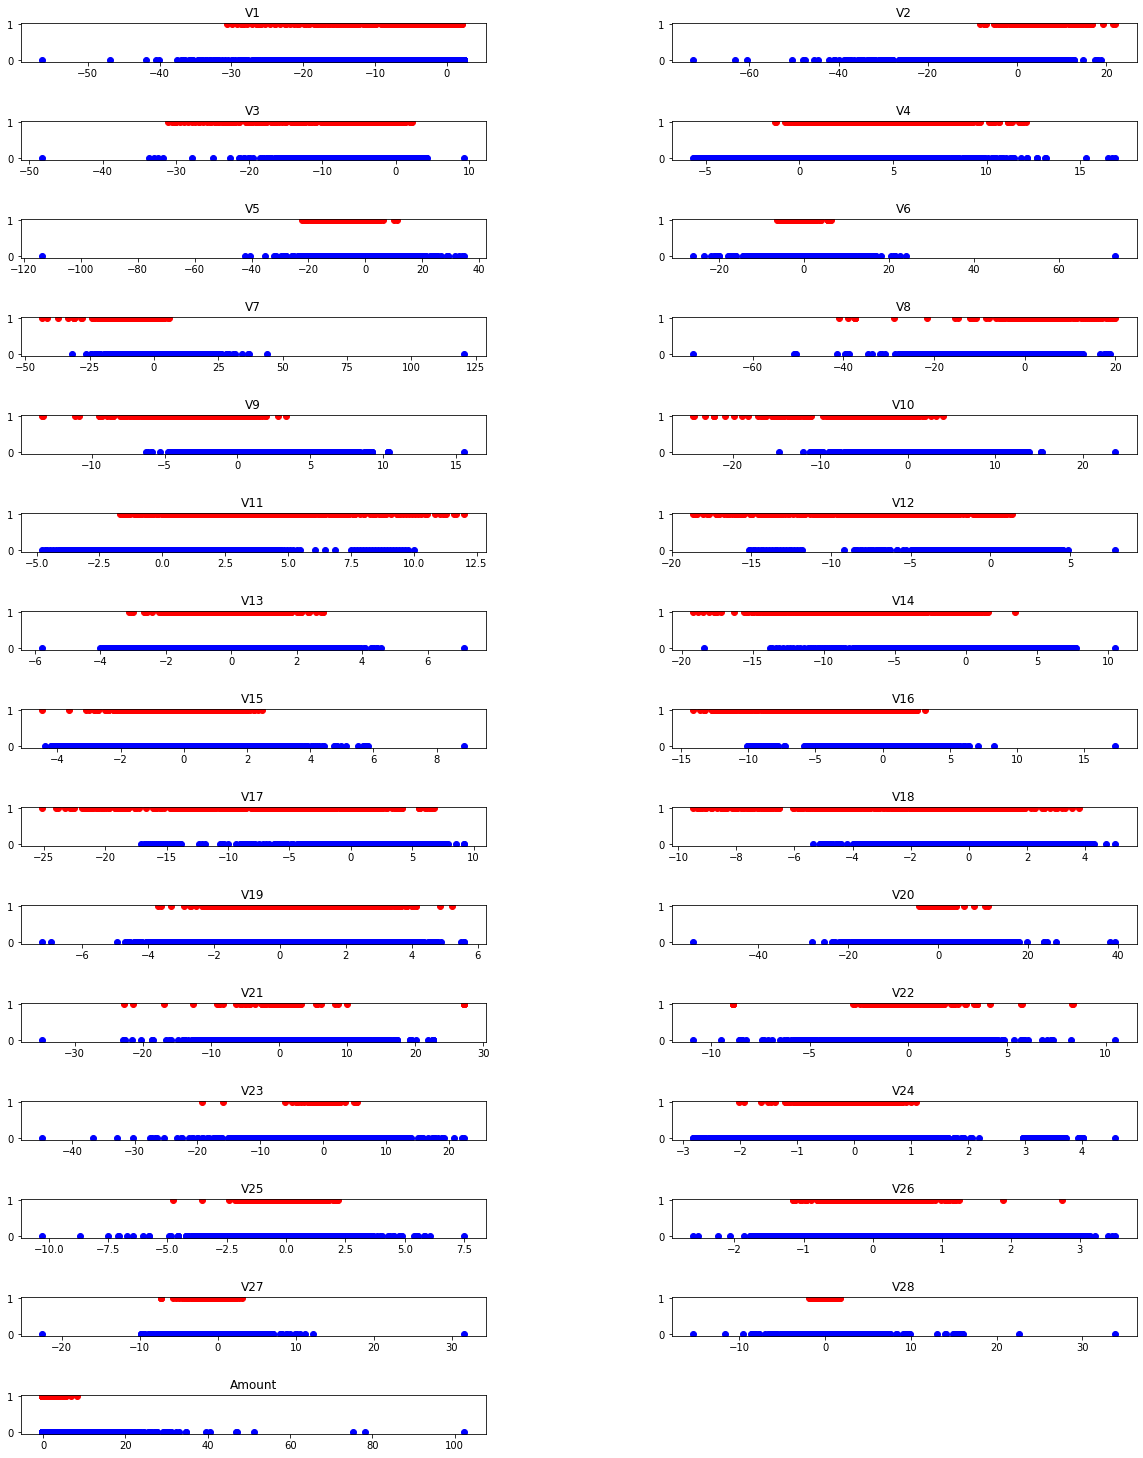

In [20]:
plt.clf()
plt.figure(figsize = (20,20))
plt.subplots_adjust(top = 0.99 ,bottom = 0.01,hspace = 1.5,wspace = 0.4)
ind = 1
for i in Xgenuine.columns:
  plt.subplot(15,2,ind).title.set_text(i)
  plt.scatter(Xgenuine[i],Ygenuine,c='b')
  plt.scatter(Xfraud[i],Yfraud,c='r')
  ind+=1

plt.savefig(root+ 'Variation Over Data/'+'Allfeatures.png')
plt.show()

##Results

As we can see the distribution of the labels over some of the features is very random is distributed all over the range which shows that the results have a very low dependency on the feature and it could be redundant. So we have to remove some of them. 

##Feature Selection

In [21]:
k = 10
kbest = SelectKBest(f_classif,k=k)

In [22]:
kbest.fit(X,Y)

SelectKBest(k=10, score_func=<function f_classif at 0x7f0b94b24a60>)

In [23]:
mask =  kbest.get_support()
not_mask = np.logical_not(mask)
all_features = np.array(list(X))
best_features = all_features[mask]
bad_features = all_features[not_mask]

print('Best Features:',best_features)
print('Bad Features:',bad_features)

Best Features: ['V3' 'V4' 'V7' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18']
Bad Features: ['V1' 'V2' 'V5' 'V6' 'V8' 'V9' 'V13' 'V15' 'V19' 'V20' 'V21' 'V22' 'V23'
 'V24' 'V25' 'V26' 'V27' 'V28' 'Amount']


##Spliting Training and testing datasets


In [24]:
XgenTrain,XgenTest= train_test_split(Xgenuine[best_features],test_size = 0.3)
XfraudTrain,XfraudTest = train_test_split(Xfraud[best_features],test_size = 0.3)

In [25]:
Xtrain = pd.concat([XgenTrain, XfraudTrain], ignore_index=True)
Ytrain = pd.concat([pd.DataFrame(np.zeros(len(XgenTrain)),dtype='int64'),pd.DataFrame(np.ones(len(XfraudTrain)),dtype='int64')])
Xtest = pd.concat([XgenTest, XfraudTest], ignore_index=True)
Ytest = pd.concat([pd.DataFrame(np.zeros(len(XgenTest)),dtype='int64'),pd.DataFrame(np.ones(len(XfraudTest)),dtype='int64')])
Ytrain = Ytrain.values.reshape(len(Ytrain))
Ytest = Ytest.values.reshape(len(Ytest))

##Traning Different ML Models 



### K-nearest Neighbour Algorithm 

In [26]:
kmn = []
for i in range(1,16):
  kmn.append(KNeighborsClassifier(n_neighbors=i)) 
  kmn[i-1].fit(Xtrain,Ytrain)
  print('Trained for {} neghbour'.format(i))

Trained for 1 neghbour
Trained for 2 neghbour
Trained for 3 neghbour
Trained for 4 neghbour
Trained for 5 neghbour
Trained for 6 neghbour
Trained for 7 neghbour
Trained for 8 neghbour
Trained for 9 neghbour
Trained for 10 neghbour
Trained for 11 neghbour
Trained for 12 neghbour
Trained for 13 neghbour
Trained for 14 neghbour
Trained for 15 neghbour


###Decision Tree Classifier


In [27]:
DTmodel= DecisionTreeClassifier()

In [28]:
DTmodel.fit(Xtrain,Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

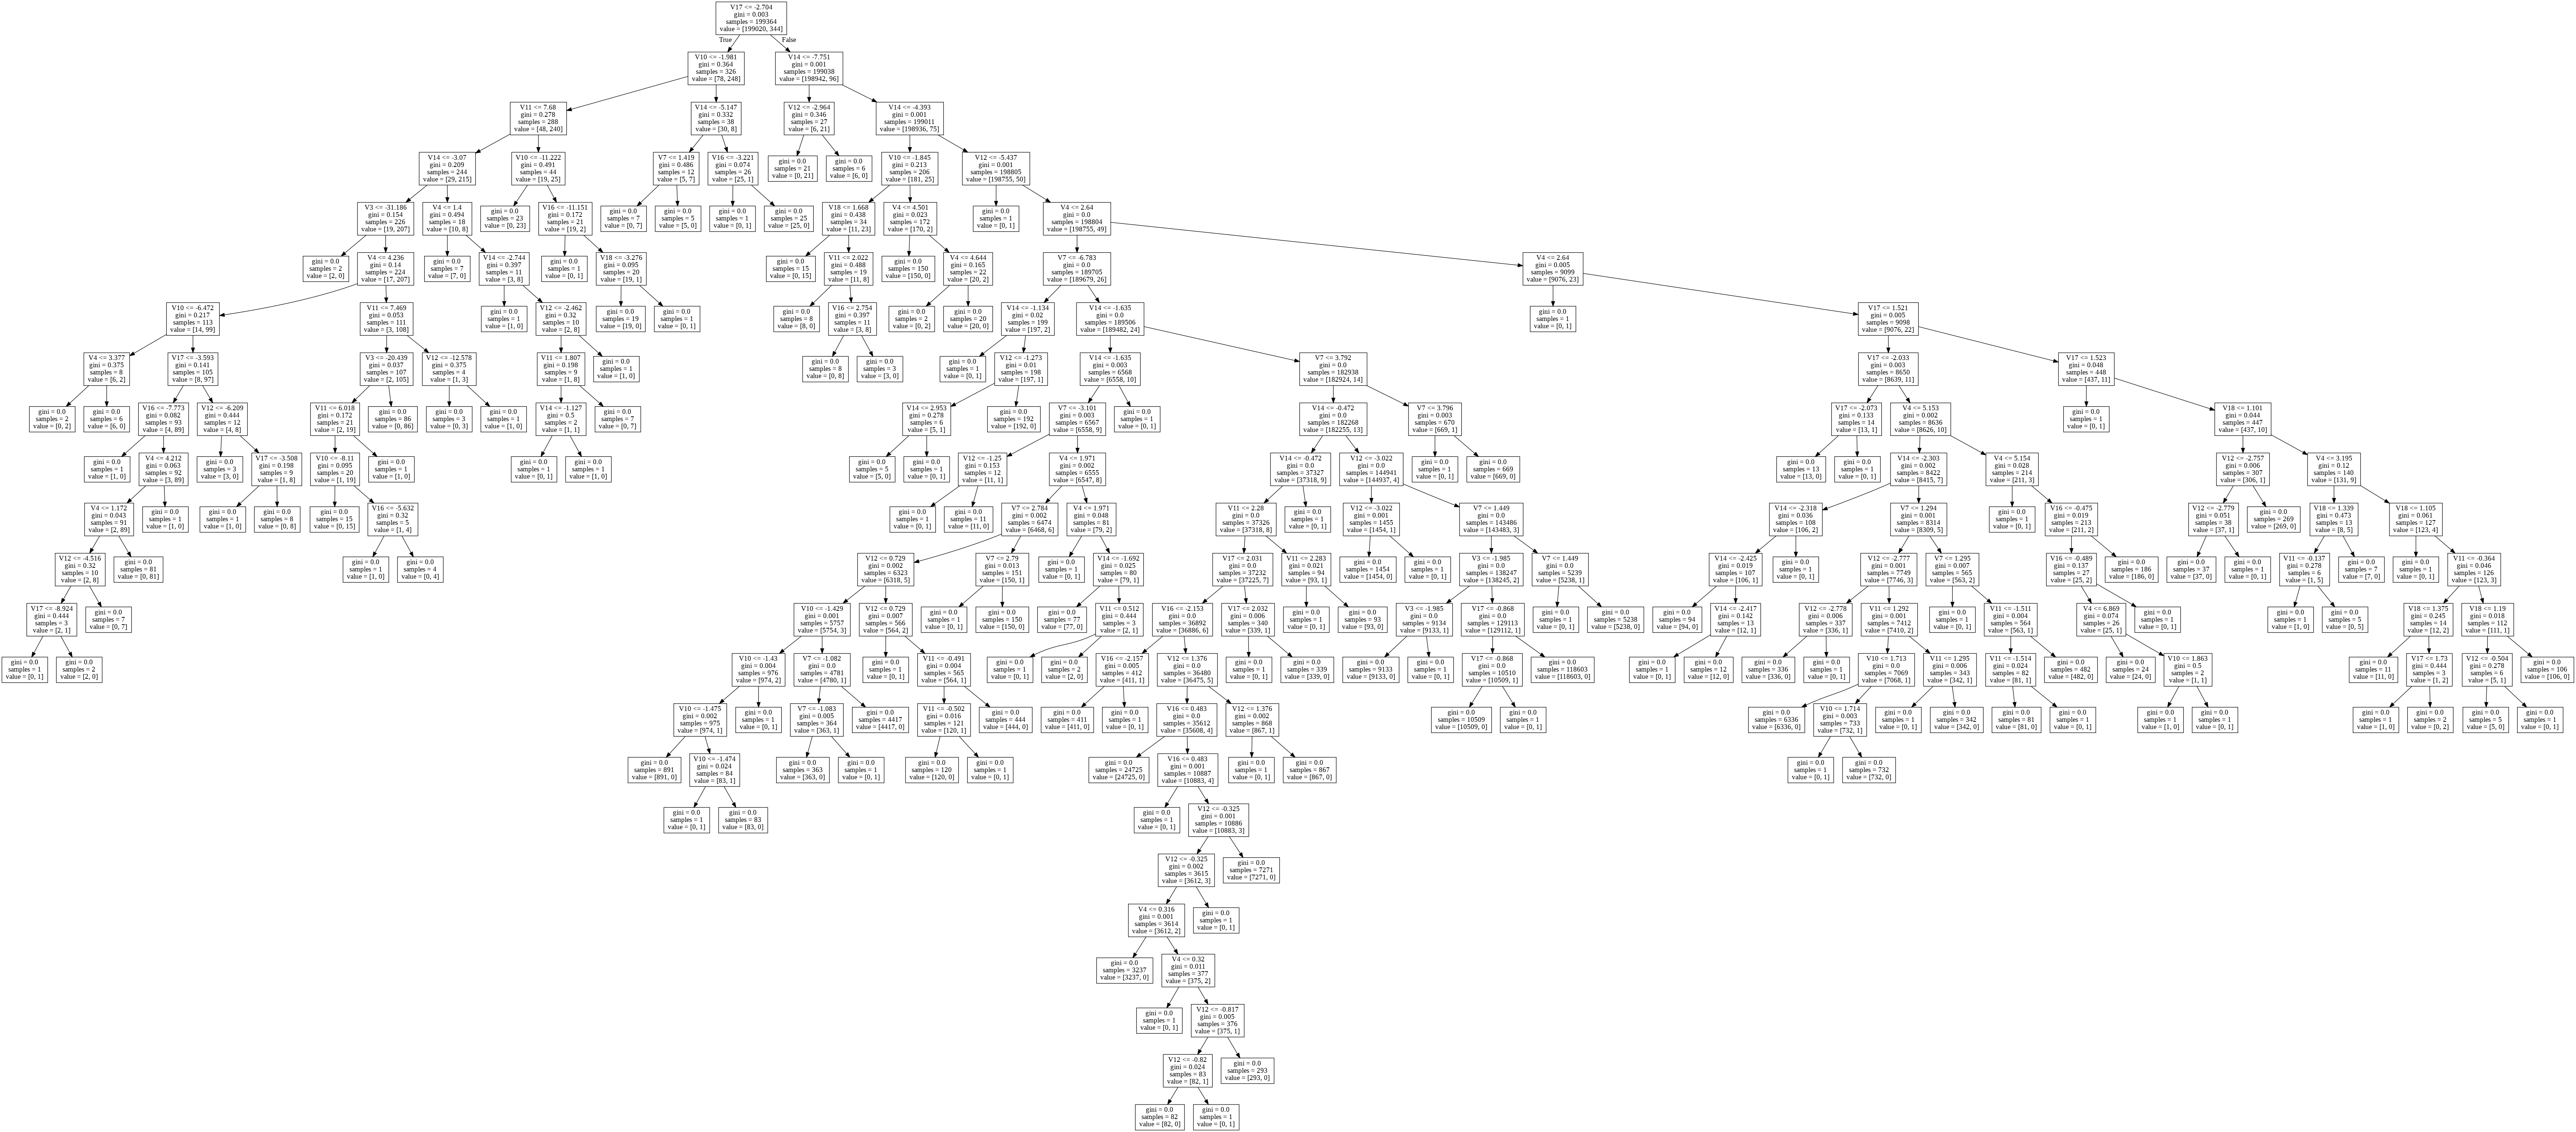

In [29]:
# Creating Picture of the deciosion tree 

dot_data = export_graphviz(DTmodel, feature_names=Xtrain.columns)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [31]:
# Saving Image
graph.write_png(root+'Models/DT/DecisionTree.png') 

True

###Random Forest

In [32]:
RFmodel = RandomForestClassifier()

In [33]:
RFmodel.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
# Svaing images of all trees
i=0
for tree in RFmodel.estimators_:
  dot_data = export_graphviz(tree, feature_names=Xtrain.columns)
  graph = pydotplus.graph_from_dot_data(dot_data)
  graph.write_png(root + 'Models/RF/RandomForestImages/{}.png'.format(i))
  i+=1


###Naive Bayes

In [37]:
GNBmodel = GaussianNB()

In [38]:
GNBmodel.fit(Xtrain,Ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

###Support Vector Machine

In [39]:
SVMCmodel = svm.SVC()

In [41]:
SVMCmodel.fit(Xtrain,Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##Checking Accuracy of the Trained Models 


###KNN 

In [57]:
KNNError = {
    'trainAcc':[],
    'testAcc':[]
}

for i in range(1,16):
  tp,fp,tn,fn = 0,0,0,0
  pred = kmn[i-1].predict(XgenTrain)
  for j in pred:
    if  j == 0:
      tp+=1
    else:
      fn+=1
  pred = kmn[i-1].predict(XfraudTrain)
  for j in pred:
    if j == 1:
      tn+=1
    else:
      fp+=1
  KNNError['trainAcc'].append({
      "trueP":tp,
      "falseP":fp,
      "trueN":tn,
      "falseN":fn
  })
  
  tp,fp,tn,fn = 0,0,0,0

  pred = kmn[i-1].predict(XgenTest)
  
  for j in pred:
    if j == 0:
      tp+=1
    else:
      fn+=1
  pred = kmn[i-1].predict(XfraudTest)
  
  for j in pred:
    if j == 1:
      tn+=1
    else:
      fp+=1
  KNNError['testAcc'].append({
      "trueP":tp,
      "falseP":fp,
      "trueN":tn,
      "falseN":fn
  })
  print('Tested for {} neghbours'.format(i))


Tested for 1 neghbours
Tested for 2 neghbours
Tested for 3 neghbours
Tested for 4 neghbours
Tested for 5 neghbours
Tested for 6 neghbours
Tested for 7 neghbours
Tested for 8 neghbours
Tested for 9 neghbours
Tested for 10 neghbours
Tested for 11 neghbours
Tested for 12 neghbours
Tested for 13 neghbours
Tested for 14 neghbours
Tested for 15 neghbours


In [58]:
test= pd.DataFrame(KNNError['testAcc'])
train = pd.DataFrame(KNNError['trainAcc'])

In [ ]:
train['acc'] = (train['trueN']+train['trueP'])/(train['trueN']+train['trueP']+train['falseN']+train['falseP'])
train['prec'] = train['trueP']/(train['trueP']+train['falseP'])
train['rec'] =train['trueP']/(train['trueP']+train['falseN'])
train['f1'] = 2*train['prec'] *train['rec']/(train['prec']+train['rec'])

test['acc'] = (test['trueN']+test['trueP'])/(test['trueN']+test['trueP']+test['falseN']+test['falseP'])
test['prec'] = test['trueP']/(test['trueP']+test['falseP'])
test['rec'] =test['trueP']/(test['trueP']+test['falseN'])
test['f1'] = 2*test['prec'] *test['rec']/(test['prec']+test['rec'])


In [59]:
KNNAcc = {
    'test' :test,
    'train':train
}

In [60]:
KNNAcc

{'test':     trueP  falseP  trueN  falseN
 0   85276      33    115      19
 1   85291      40    108       4
 2   85287      37    111       8
 3   85291      39    109       4
 4   85288      37    111       7
 5   85289      37    111       6
 6   85286      35    113       9
 7   85287      36    112       8
 8   85285      33    115      10
 9   85286      35    113       9
 10  85283      35    113      12
 11  85283      37    111      12
 12  85282      34    114      13
 13  85282      34    114      13
 14  85279      34    114      16, 'train':      trueP  falseP  trueN  falseN
 0   199020       0    344       0
 1   199020      72    272       0
 2   199010      59    285      10
 3   199012      65    279       8
 4   199005      59    285      15
 5   199007      66    278      13
 6   199004      63    281      16
 7   199004      66    278      16
 8   198999      64    280      21
 9   199001      71    273      19
 10  198993      71    273      27
 11  198997      71

###Decision Tree Classifier

In [120]:
DTAcc = {
    'train' :{},
    'test' :{}
}
tp,fp,tn,fn = 0,0,0,0
pred = DTmodel.predict(XgenTrain)
for j in pred:
    if  j == 0:
      tp+=1
    else:
      fn+=1
pred = DTmodel.predict(XfraudTrain)
for j in pred:
  if j == 1:
    tn+=1
  else:
    fp+=1
DTAcc['train'] = {
  "trueP":tp,
  "falseP":fp,
  "trueN":tn,
  "falseN":fn   
}

tp,fp,tn,fn = 0,0,0,0
pred = DTmodel.predict(XgenTest)
for j in pred:
    if  j == 0:
      tp+=1
    else:
      fn+=1
pred = DTmodel.predict(XfraudTest)
for j in pred:
  if j == 1:
    tn+=1
  else:
    fp+=1
DTAcc['test'] = {
  "trueP":tp,
  "falseP":fp,
  "trueN":tn,
  "falseN":fn   
}

DTAcc

{'test': {'falseN': 17, 'falseP': 44, 'trueN': 104, 'trueP': 85278},
 'train': {'falseN': 0, 'falseP': 0, 'trueN': 344, 'trueP': 199020}}

###Random Forest Classifier

In [121]:
RFAcc = {
    'train' :{},
    'test' :{}
}
tp,fp,tn,fn = 0,0,0,0
pred = RFmodel.predict(XgenTrain)
for j in pred:
    if  j == 0:
      tp+=1
    else:
      fn+=1
pred = RFmodel.predict(XfraudTrain)
for j in pred:
  if j == 1:
    tn+=1
  else:
    fp+=1
RFAcc['train'] = {
  "trueP":tp,
  "falseP":fp,
  "trueN":tn,
  "falseN":fn   
}

tp,fp,tn,fn = 0,0,0,0
pred = RFmodel.predict(XgenTest)
for j in pred:
    if  j == 0:
      tp+=1
    else:
      fn+=1
pred = RFmodel.predict(XfraudTest)
for j in pred:
  if j == 1:
    tn+=1
  else:
    fp+=1
RFAcc['test'] = {
  "trueP":tp,
  "falseP":fp,
  "trueN":tn,
  "falseN":fn   
}

RFAcc

{'test': {'falseN': 6, 'falseP': 37, 'trueN': 111, 'trueP': 85289},
 'train': {'falseN': 0, 'falseP': 0, 'trueN': 344, 'trueP': 199020}}

###Naive Bayes

In [122]:
NBAcc = {
    'train' :{},
    'test' :{}
}
tp,fp,tn,fn = 0,0,0,0
pred = GNBmodel.predict(XgenTrain)
for j in pred:
    if  j == 0:
      tp+=1
    else:
      fn+=1
pred = GNBmodel.predict(XfraudTrain)
for j in pred:
  if j == 1:
    tn+=1
  else:
    fp+=1
NBAcc['train'] = {
  "trueP":tp,
  "falseP":fp,
  "trueN":tn,
  "falseN":fn   
}

tp,fp,tn,fn = 0,0,0,0
pred = GNBmodel.predict(XgenTest)
for j in pred:
    if  j == 0:
      tp+=1
    else:
      fn+=1
pred = GNBmodel.predict(XfraudTest)
for j in pred:
  if j == 1:
    tn+=1
  else:
    fp+=1
NBAcc['test'] = {
  "trueP":tp,
  "falseP":fp,
  "trueN":tn,
  "falseN":fn   
}

NBAcc

{'test': {'falseN': 749, 'falseP': 28, 'trueN': 120, 'trueP': 84546},
 'train': {'falseN': 1697, 'falseP': 46, 'trueN': 298, 'trueP': 197323}}

###Support Vector Machine

In [123]:
SVMAcc = {
    'train' :{},
    'test' :{}
}
tp,fp,tn,fn = 0,0,0,0
pred = SVMCmodel.predict(XgenTrain)
for j in pred:
    if  j == 0:
      tp+=1
    else:
      fn+=1
pred = SVMCmodel.predict(XfraudTrain)
for j in pred:
  if j == 1:
    tn+=1
  else:
    fp+=1
SVMAcc['train'] = {
  "trueP":tp,
  "falseP":fp,
  "trueN":tn,
  "falseN":fn   
}

tp,fp,tn,fn = 0,0,0,0
pred = SVMCmodel.predict(XgenTest)
for j in pred:
    if  j == 0:
      tp+=1
    else:
      fn+=1
pred = SVMCmodel.predict(XfraudTest)
for j in pred:
  if j == 1:
    tn+=1
  else:
    fp+=1
SVMAcc['test'] = {
  "trueP":tp,
  "falseP":fp,
  "trueN":tn,
  "falseN":fn   
}

SVMAcc

{'test': {'falseN': 4, 'falseP': 41, 'trueN': 107, 'trueP': 85291},
 'train': {'falseN': 7, 'falseP': 59, 'trueN': 285, 'trueP': 199013}}

##Plotting Confusion Matrices

In [113]:
def plotConfusion(val,title,path):
  plt.clf()
  array = [[val['trueP'],val['falseN']],
           [val['falseP'],val['trueN']]]
  df_cm = pd.DataFrame(array, ['True','False'], ['True','False'])
  plt.figure(figsize=(8,6))
  sn.set(font_scale=1.4) 
  sn.heatmap(df_cm, annot=True,fmt='d')
  plt.xlabel('Prediction')
  plt.ylabel('Actual')
  plt.title(title)
  plt.savefig(path)
  plt.show()


###KNN

<Figure size 432x288 with 0 Axes>

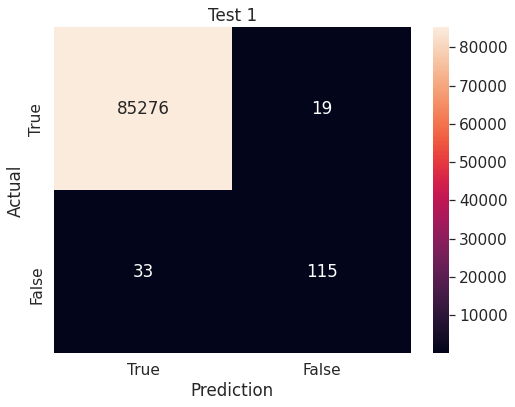

<Figure size 432x288 with 0 Axes>

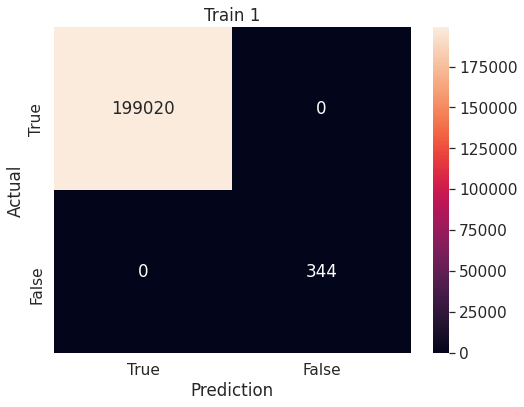

<Figure size 432x288 with 0 Axes>

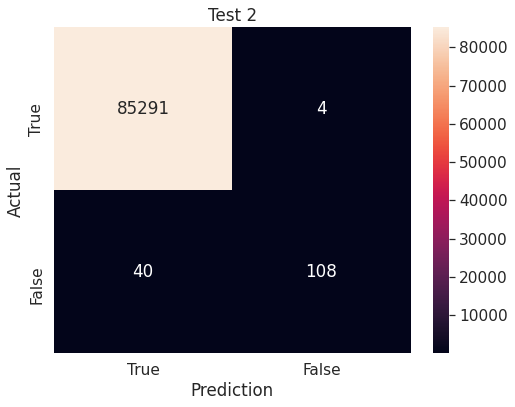

<Figure size 432x288 with 0 Axes>

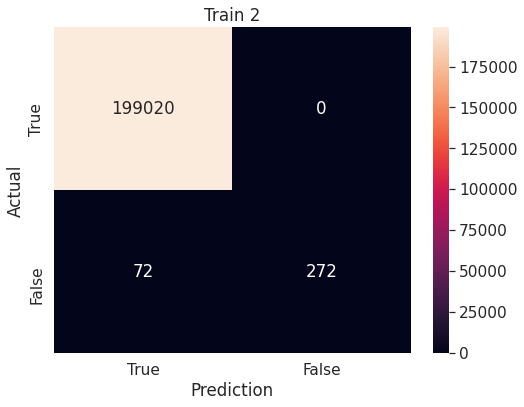

<Figure size 432x288 with 0 Axes>

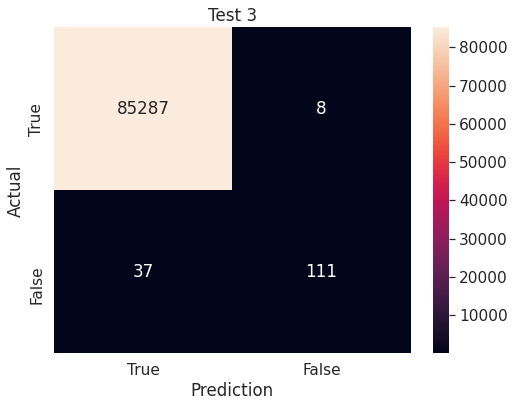

<Figure size 432x288 with 0 Axes>

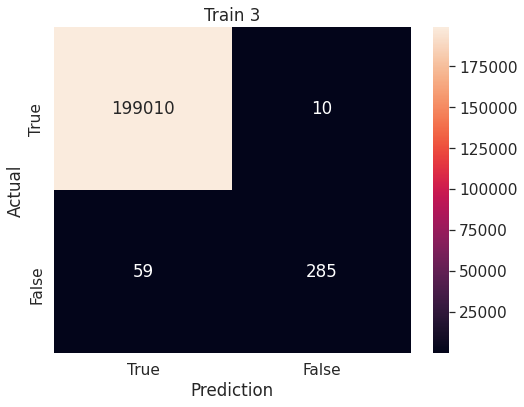

<Figure size 432x288 with 0 Axes>

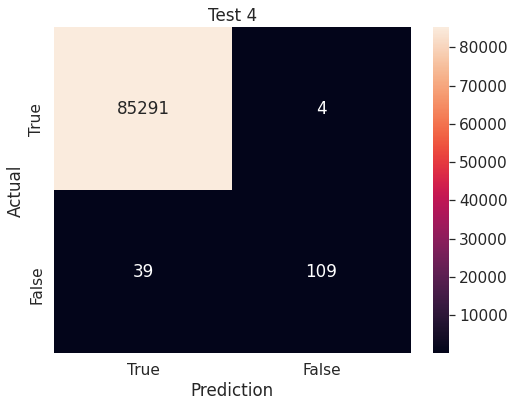

<Figure size 432x288 with 0 Axes>

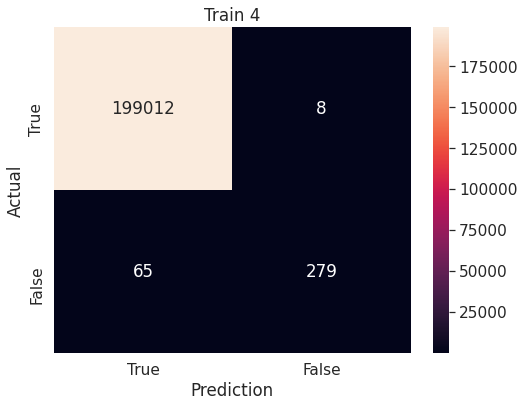

<Figure size 432x288 with 0 Axes>

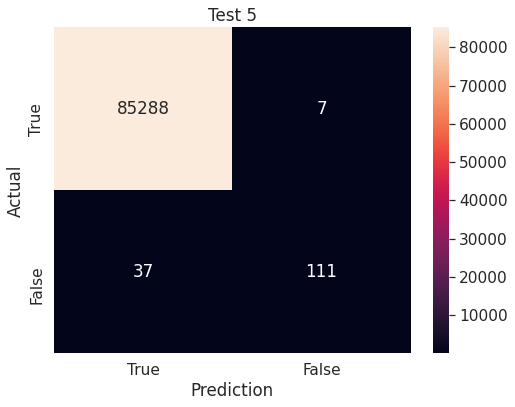

<Figure size 432x288 with 0 Axes>

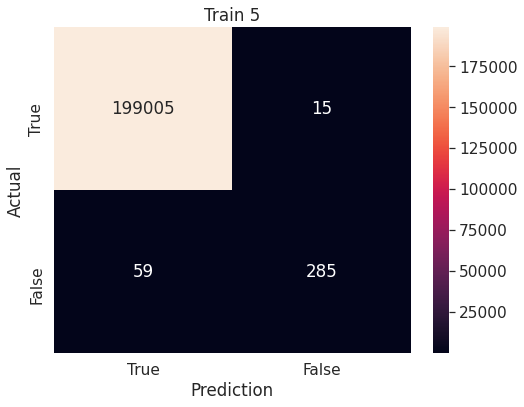

<Figure size 432x288 with 0 Axes>

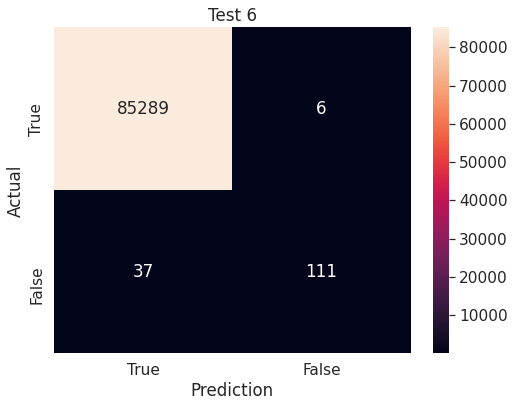

<Figure size 432x288 with 0 Axes>

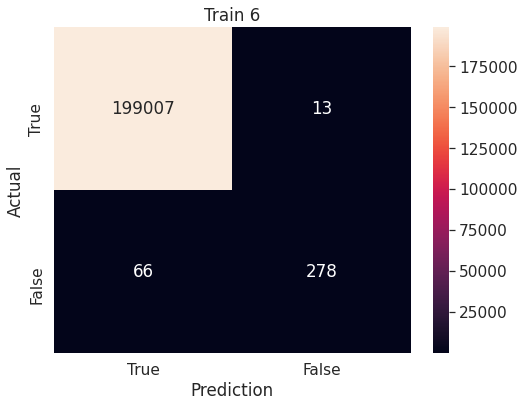

<Figure size 432x288 with 0 Axes>

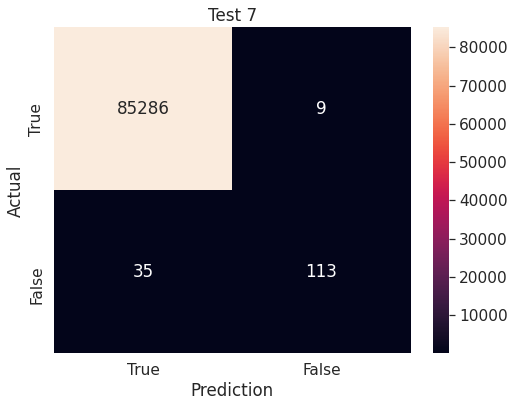

<Figure size 432x288 with 0 Axes>

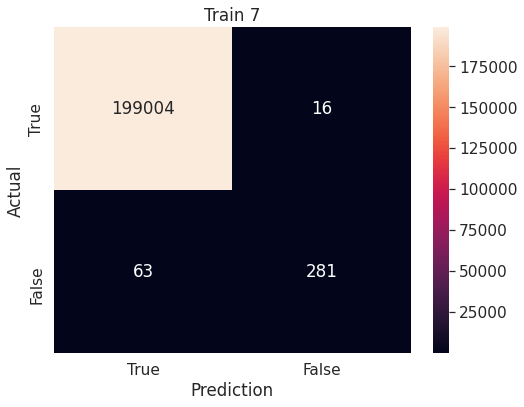

<Figure size 432x288 with 0 Axes>

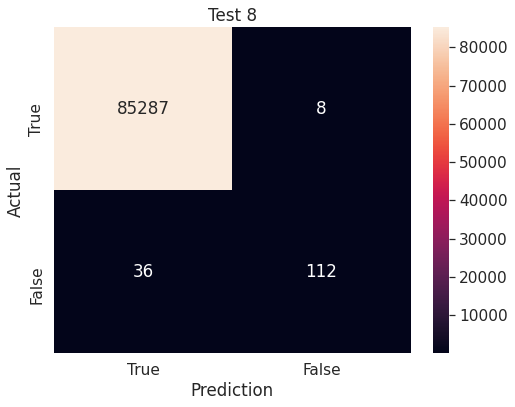

<Figure size 432x288 with 0 Axes>

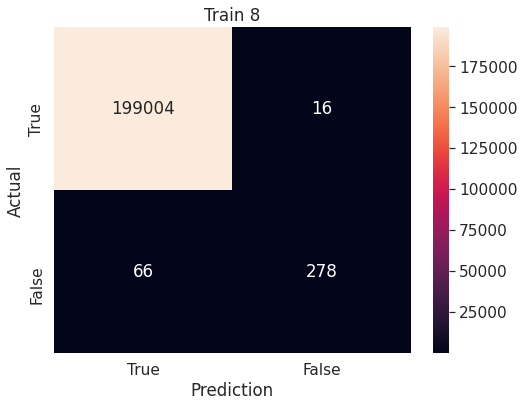

<Figure size 432x288 with 0 Axes>

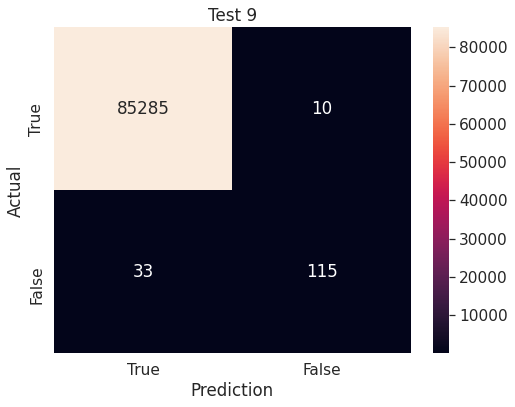

<Figure size 432x288 with 0 Axes>

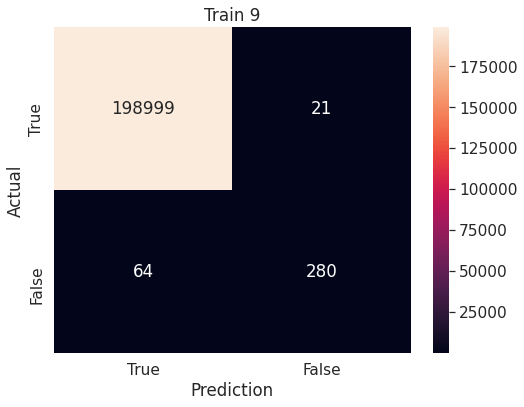

<Figure size 432x288 with 0 Axes>

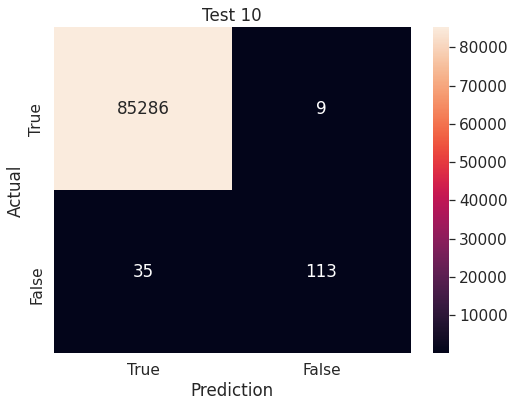

<Figure size 432x288 with 0 Axes>

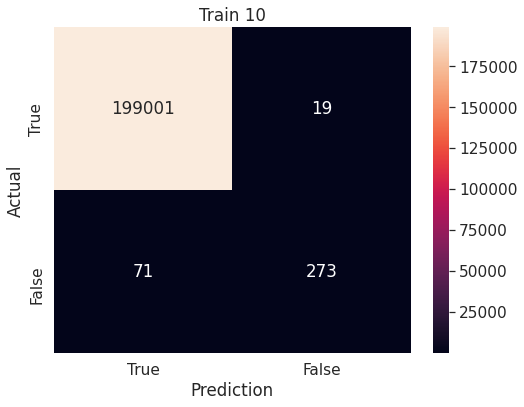

<Figure size 432x288 with 0 Axes>

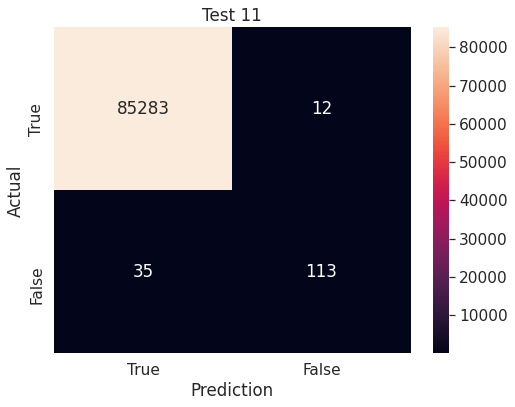

<Figure size 432x288 with 0 Axes>

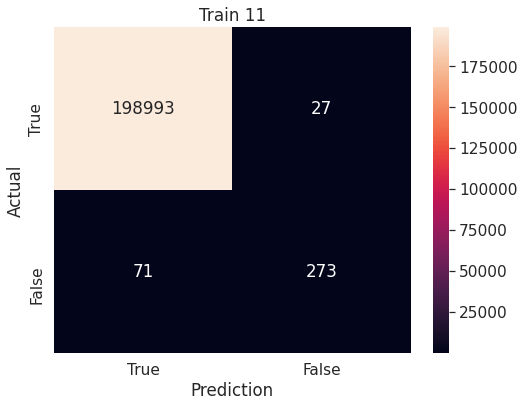

<Figure size 432x288 with 0 Axes>

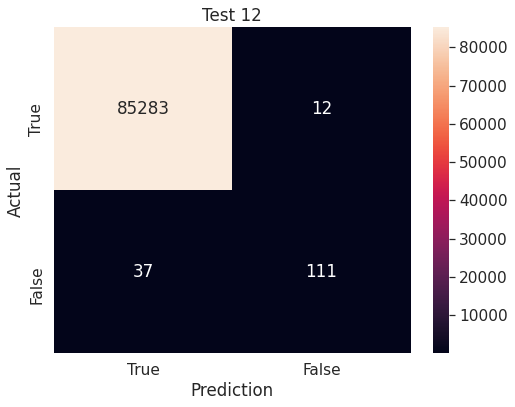

<Figure size 432x288 with 0 Axes>

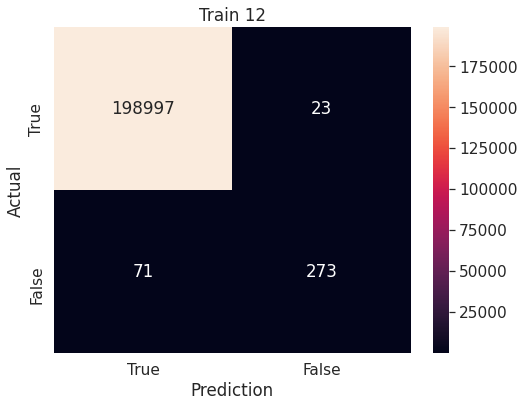

<Figure size 432x288 with 0 Axes>

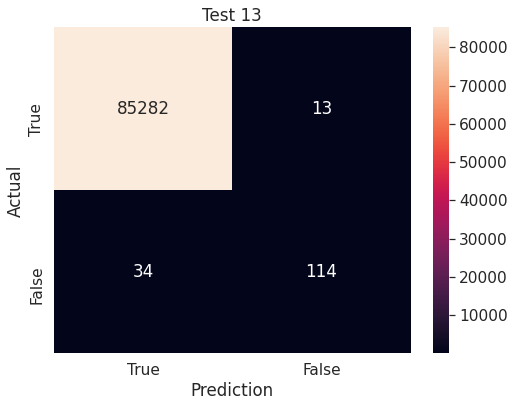

<Figure size 432x288 with 0 Axes>

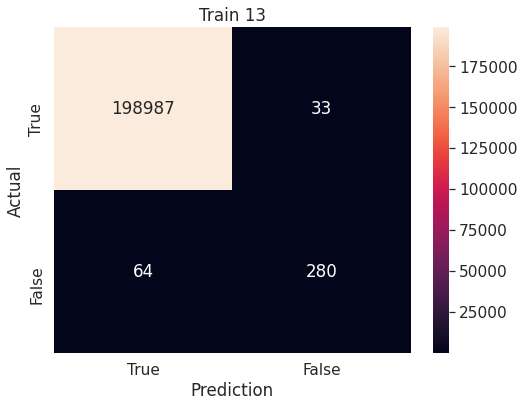

<Figure size 432x288 with 0 Axes>

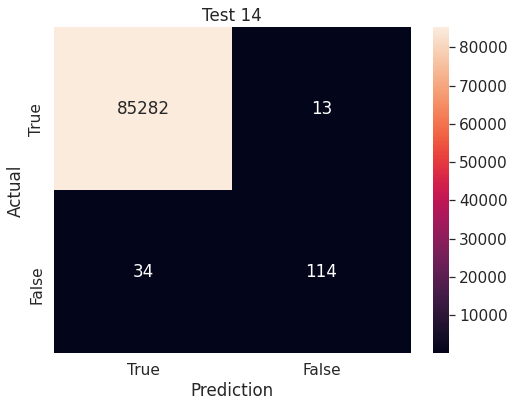

<Figure size 432x288 with 0 Axes>

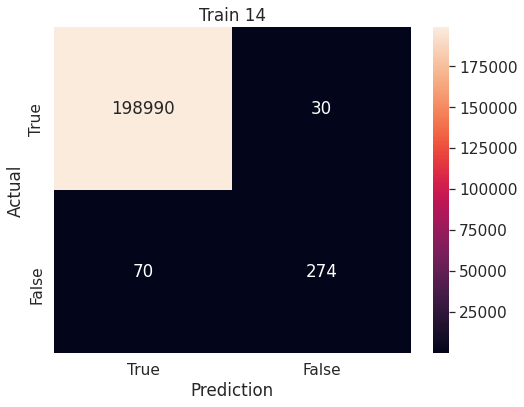

<Figure size 432x288 with 0 Axes>

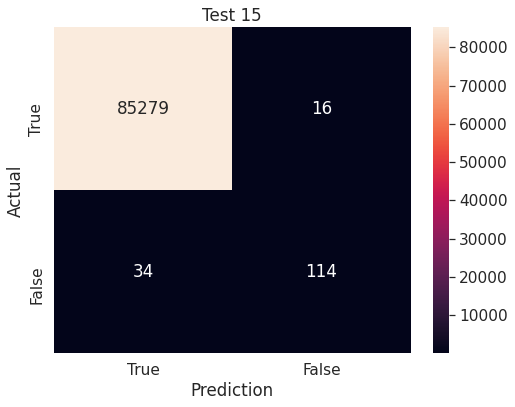

<Figure size 432x288 with 0 Axes>

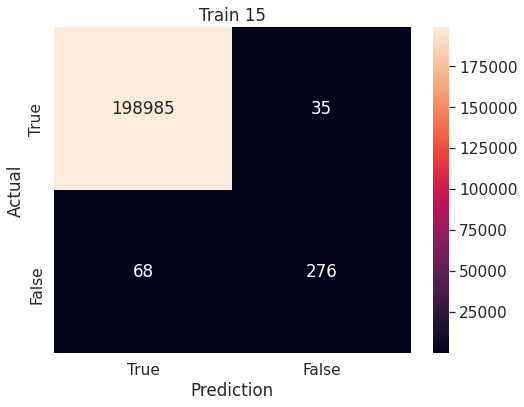

In [127]:
for i in range(15):
  # Testing Accuracy
  val = KNNAcc['test'].loc[i]
  title = 'Test '+str(i+1)
  path = root +'Models/KNN/Test Confusion Matrices/' +str(i+1)+'.png'
  plotConfusion(val,title,path)
  # Training Accuracy
  val = KNNAcc['train'].loc[i]
  title = 'Train '+str(i+1)
  path = root +'Models/KNN/Train Confusion Matrices/' +str(i+1)+'.png'
  plotConfusion(val,title,path)


###Decision Tree Classifier

<Figure size 432x288 with 0 Axes>

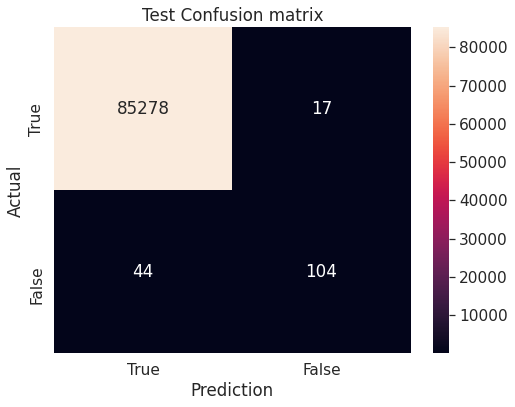

<Figure size 432x288 with 0 Axes>

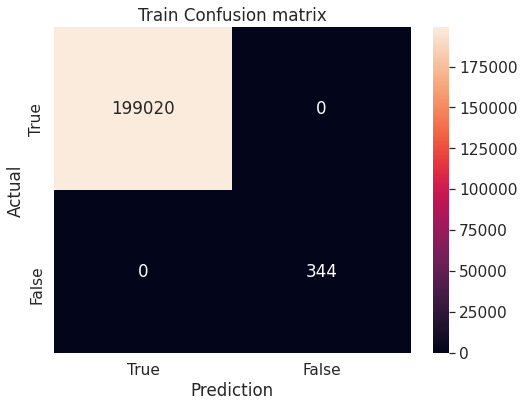

In [125]:
plotConfusion(DTAcc['test'],'Test Confusion matrix',root+'Models/DT/Test Confusion matrix.jpg')
plotConfusion(DTAcc['train'],'Train Confusion matrix',root+'Models/DT/Train Confusion matrix.jpg')

###Random Forest Classifier

<Figure size 432x288 with 0 Axes>

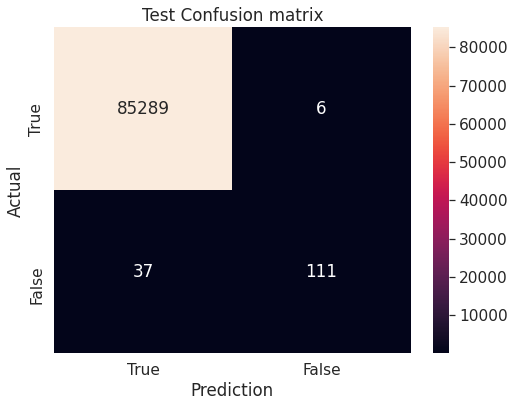

<Figure size 432x288 with 0 Axes>

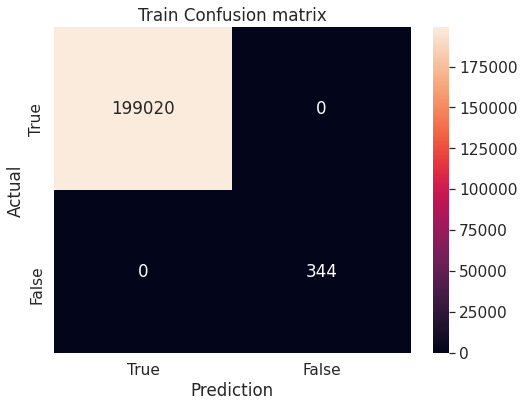

In [126]:
plotConfusion(RFAcc['test'],'Test Confusion matrix',root+'Models/RF/Test Confusion matrix.jpg')
plotConfusion(RFAcc['train'],'Train Confusion matrix',root+'Models/RF/Train Confusion matrix.jpg')

###Naive Bayes 

<Figure size 432x288 with 0 Axes>

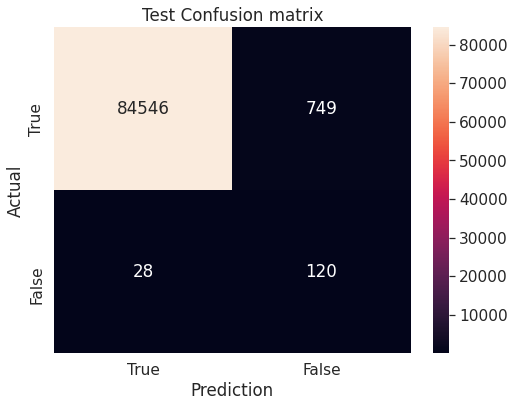

<Figure size 432x288 with 0 Axes>

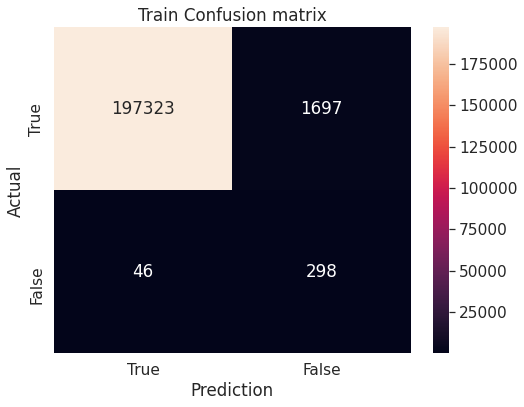

In [128]:
plotConfusion(NBAcc['test'],'Test Confusion matrix',root+'Models/NB/Test Confusion matrix.jpg')
plotConfusion(NBAcc['train'],'Train Confusion matrix',root+'Models/NB/Train Confusion matrix.jpg')

###Support Vector Machine

<Figure size 432x288 with 0 Axes>

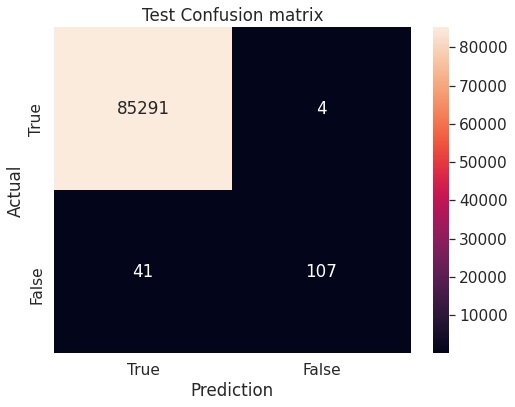

<Figure size 432x288 with 0 Axes>

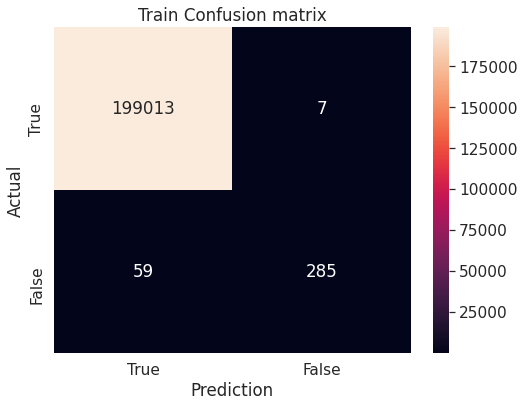

In [129]:
plotConfusion(SVMAcc['test'],'Test Confusion matrix',root+'Models/SVM/Test Confusion matrix.jpg')
plotConfusion(SVMAcc['train'],'Train Confusion matrix',root+'Models/SVM/Train Confusion matrix.jpg')

In [132]:
print(KNNAcc['test'])
print(KNNAcc['train'])
print(DTAcc)
print(RFAcc)
print(NBAcc)
print(SVMAcc)

    trueP  falseP  trueN  falseN
0   85276      33    115      19
1   85291      40    108       4
2   85287      37    111       8
3   85291      39    109       4
4   85288      37    111       7
5   85289      37    111       6
6   85286      35    113       9
7   85287      36    112       8
8   85285      33    115      10
9   85286      35    113       9
10  85283      35    113      12
11  85283      37    111      12
12  85282      34    114      13
13  85282      34    114      13
14  85279      34    114      16
     trueP  falseP  trueN  falseN
0   199020       0    344       0
1   199020      72    272       0
2   199010      59    285      10
3   199012      65    279       8
4   199005      59    285      15
5   199007      66    278      13
6   199004      63    281      16
7   199004      66    278      16
8   198999      64    280      21
9   199001      71    273      19
10  198993      71    273      27
11  198997      71    273      23
12  198987      64    280     

## Analysing results till now

As we can see the number of false prediction for a fruad transaction(i.e falseP) is way high in testing the best we could acieve is 28 in case of Naive Bayes. Which means 1 in 3 fruad transactoins will be predicted as Genuine which is high,the reason behind this is mainly because of the uneven distribution of data ,there are only a few cases where the transaction are fruad.

##Autoencoder for Anomalies
An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner.The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”. Along with the reduction side, a reconstructing side is learnt, where the autoencoder tries to generate from the reduced encoding a representation as close as possible to its original input, hence its name. Several variants exist to the basic model, with the aim of forcing the learned representations of the input to assume useful properties.


In [133]:
XtrainA,XtestA = train_test_split(XgenTrain,test_size = 0.2)


###Designing Model
This is a standard dense autoencoder with four layers.

In [137]:
input_dim = XtrainA.shape[1]
encoding_dim = 10

Amodel = Sequential()
Amodel.add(Dense(encoding_dim,activation="tanh",input_shape=(input_dim,)))
Amodel.add(Dense(encoding_dim//2,activation = "relu"))
Amodel.add(Dense(encoding_dim//2,activation = "tanh"))
Amodel.add(Dense(input_dim,activation = "relu"))

Amodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________


###Training Model

In [138]:
epoch = 40

batch_size = 32

Amodel.compile(optimizer='adam',loss = 'mean_squared_error',metrics=['acc'])
history = Amodel.fit(XtrainA,XtrainA,
                    epochs = epoch,
                    validation_data = (XtestA,XtestA),
                    verbose = 1)

Train on 159216 samples, validate on 39804 samples
Epoch 1/40
159216/159216 [==============================] - 8s 49us/step - loss: 0.8432 - acc: 0.5366 - val_loss: 0.7780 - val_acc: 0.6319
Epoch 2/40
159216/159216 [==============================] - 7s 46us/step - loss: 0.7529 - acc: 0.6725 - val_loss: 0.7431 - val_acc: 0.6903
Epoch 3/40
159216/159216 [==============================] - 7s 45us/step - loss: 0.7290 - acc: 0.7120 - val_loss: 0.7276 - val_acc: 0.7133
Epoch 4/40
159216/159216 [==============================] - 7s 46us/step - loss: 0.6859 - acc: 0.7614 - val_loss: 0.6731 - val_acc: 0.7836
Epoch 5/40
159216/159216 [==============================] - 8s 49us/step - loss: 0.6662 - acc: 0.7820 - val_loss: 0.6686 - val_acc: 0.7815
Epoch 6/40
159216/159216 [==============================] - 7s 47us/step - loss: 0.6633 - acc: 0.7823 - val_loss: 0.6690 - val_acc: 0.7773
Epoch 7/40
159216/159216 [==============================] - 7s 46us/step - loss: 0.6617 - acc: 0.7832 - val_loss: 0

###Model Performance
A simple plot of model accuracy to confirm that it is learning something.

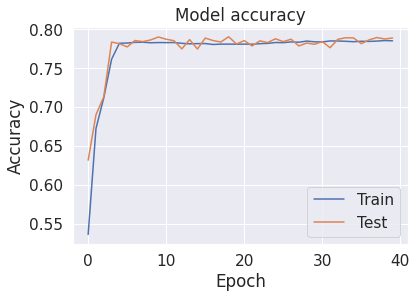

In [141]:
plt.clf()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

###Reconstruction Error 
We will find threshold value to classify the genuine or fruad transaction.


In [145]:
GenPred = Amodel.predict(XgenTrain)
Grmse = np.sqrt(np.mean(np.power(GenPred-XgenTrain,2),axis = 1))
GenErr = pd.DataFrame({'reconstruction_error': Grmse, 'true_class': np.zeros((len(GenPred),), dtype='int64')})
FraPred = Amodel.predict(XfraudTrain)
Frmse = np.sqrt(np.mean(np.power(FraPred-XfraudTrain,2),axis = 1))
FraErr = pd.DataFrame({'reconstruction_error': Frmse, 'true_class': np.ones((len(FraPred),), dtype='int64')})

In [242]:
i = (GenErr['reconstruction_error'].mean()//0.001)*0.001
# print(i)
f = len(FraErr[FraErr['reconstruction_error']<i])/len(FraErr)
g = len(GenErr[GenErr['reconstruction_error']>i])/len(GenErr)
while(f <= 0.1):
  i += 0.001
  f = len(FraErr[FraErr['reconstruction_error']<i])/len(FraErr)
  g = len(GenErr[GenErr['reconstruction_error']>i])/len(GenErr)

i = i//0.001*0.001
# print(i)
# print(len(FraErr[FraErr['reconstruction_error']<i]))
# print(len(GenErr[GenErr['reconstruction_error']>i]))
threshold = i

<Figure size 432x288 with 0 Axes>

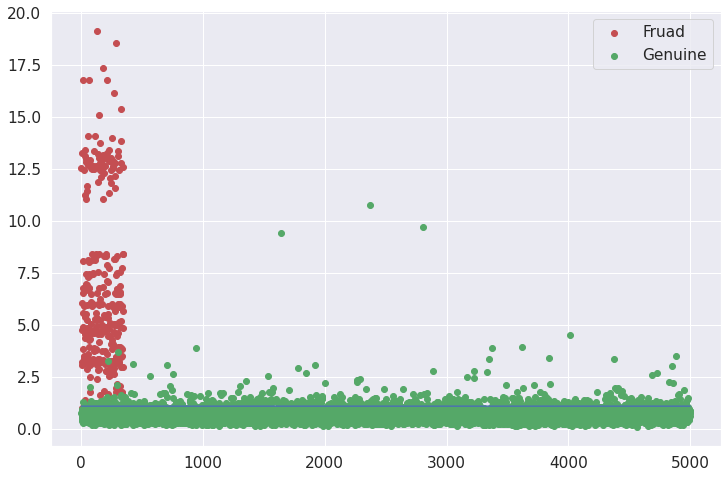

In [243]:
plt.clf()
plt.subplots(figsize=(12,8))
plt.scatter(range(1,1+len(FraErr['reconstruction_error'])),
            FraErr['reconstruction_error'], color = 'r',label = 'Fruad')
plt.scatter(range(1,1+len(GenErr['reconstruction_error'].head(5000))),
            GenErr['reconstruction_error'].head(5000), color = 'g',label = 'Genuine')
plt.plot(range(1,5001),[threshold for i in range(5000)],color = 'b')
plt.legend()
plt.savefig(root+'Models/AE/thresholdplot.jpg')
plt.show()

In [244]:
# Function for prediction 
def predict(data):
  pred = Amodel.predict(data)
  reconerr =  np.sqrt(np.mean(np.power(pred-data,2),axis = 1))
  return [0 if i<threshold else 1 for i in reconerr]

###Checking Accuracy
Plotting Confusion matrix for training and testing datset

<Figure size 432x288 with 0 Axes>

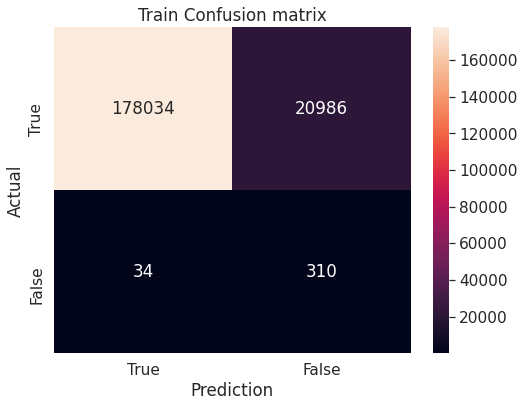

<Figure size 432x288 with 0 Axes>

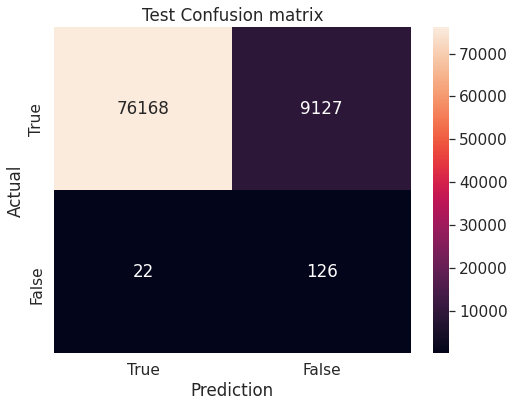

In [247]:
# Train
AEAcc = {
    'train' :{},
    'test' :{}
}

tp,fp,tn,fn = 0,0,0,0
pred = predict(XgenTrain)
for i in pred:
  if i == 0:
    tp += 1
  else:
    fn += 1
pred = predict(XfraudTrain)
for i in pred:
  if i == 1:
    tn += 1
  else:
    fp += 1
AEAcc['train'] = {
    'trueP':tp,
    'trueN':tn,
    'falseP':fp,
    'falseN':fn 
}
tp,fp,tn,fn = 0,0,0,0
pred = predict(XgenTest)
for i in pred:
  if i == 0:
    tp += 1
  else:
    fn += 1
pred = predict(XfraudTest)
for i in pred:
  if i == 1:
    tn += 1
  else:
    fp += 1
AEAcc['test'] = {
    'trueP':tp,
    'trueN':tn,
    'falseP':fp,
    'falseN':fn 
}

plotConfusion(AEAcc['train'],'Train Confusion matrix',root +'Models/AE/Train Confusion Matrix.jpg')
plotConfusion(AEAcc['test'],'Test Confusion matrix',root +'Models/AE/Test Confusion Matrix.jpg')


###Analysing result 

Though we have increased the  cases for false negative (i.e. the case where genuine transaction is considered as fruad) but the reduction in case of fraud transaction matters more. So we can consider it as best model till now.

##Saving all Models and Data for later use using pickle


In [260]:
dat = open(root+'Models/data.pkl','wb')
pickle.dump([X,Y,best_features,bad_features],dat)
dat.close()

In [261]:
GN = open(root+ 'Models/NB/GNBmodel.pkl','wb')
pickle.dump(GNBmodel,GN)
GN.close()

In [263]:
KNN = open(root+ 'Models/KNN/KNNmodel.pkl','wb')
pickle.dump(kmn,KNN)
KNN.close()

In [262]:
DT = open(root+ 'Models/DT/DTmodel.pkl','wb')
pickle.dump(DTmodel,DT)
DT.close()

In [264]:
RF = open(root + 'Models/RF/RFmodel.pkl','wb')
pickle.dump(RFmodel,RF)
RF.close()

In [265]:
SVM = open(root+'Models/SVM/SVCmodel.pkl','wb')
pickle.dump(SVMCmodel,SVM)
SVM.close()

In [266]:
AE = open(root+'Models/AE/AEmodel.pkl','wb')
pickle.dump(Amodel,AE)
AE.close()